In [1]:
#Importing Libraries

In [2]:
import tensorflow as tf
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

2024-05-17 10:04:36.302485: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [3]:
##Data Preprocessing

In [4]:
# Training image preprocessing

In [5]:
training_set = tf.keras.utils.image_dataset_from_directory(
    'train',
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(128, 128),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False,
    pad_to_aspect_ratio=False,
    verbose=True,
)

Found 3807 files belonging to 5 classes.


##Validating image preprocessing

In [6]:
validation_set = tf.keras.utils.image_dataset_from_directory(
    'valid',
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(128, 128),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False,
    pad_to_aspect_ratio=False,
    verbose=True,
)

Found 2259 files belonging to 5 classes.


In [7]:
training_set


<_PrefetchDataset element_spec=(TensorSpec(shape=(None, 128, 128, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None, 5), dtype=tf.float32, name=None))>

In [8]:
for x,y in training_set:
    print(x,x.shape)
    print(y,y.shape)
    break

tf.Tensor(
[[[[156.5  155.5  160.5 ]
   [156.   155.   160.  ]
   [157.5  156.5  161.5 ]
   ...
   [118.25 116.25 119.25]
   [119.   117.   120.  ]
   [123.5  121.5  124.5 ]]

  [[155.75 154.75 159.75]
   [159.   158.   163.  ]
   [160.25 159.25 164.25]
   ...
   [116.75 114.75 117.75]
   [126.75 124.75 127.75]
   [109.75 107.75 110.75]]

  [[157.75 156.75 161.75]
   [160.5  159.5  164.5 ]
   [162.   161.   166.  ]
   ...
   [134.75 132.75 135.75]
   [107.5  105.5  108.5 ]
   [134.75 132.75 135.75]]

  ...

  [[152.75 150.75 153.75]
   [151.   149.   152.  ]
   [153.   151.   154.  ]
   ...
   [131.   127.   128.  ]
   [124.75 120.75 121.75]
   [110.25 106.25 107.25]]

  [[152.75 150.75 153.75]
   [151.5  149.5  152.5 ]
   [154.5  152.5  155.5 ]
   ...
   [106.   102.   103.  ]
   [125.75 121.75 122.75]
   [110.75 106.75 107.75]]

  [[150.5  148.5  151.5 ]
   [149.5  147.5  150.5 ]
   [153.   151.   154.  ]
   ...
   [115.   111.   112.  ]
   [142.75 138.75 139.75]
   [119.5  115.5  11

In [9]:
from tensorflow.keras.layers import Dense,Conv2D,Flatten,Dropout
from tensorflow.keras.layers import MaxPool2D
from tensorflow.keras.models import Sequential

In [10]:
model = Sequential()

In [11]:
## Building Convolution Layer

In [12]:
model.add(Conv2D(filters=32,kernel_size=3,padding='same',activation='relu',input_shape=[128,128,3]))
model.add(Conv2D(filters=32,kernel_size=3,activation='relu'))
model.add(MaxPool2D(pool_size=2,strides=2))

/Users/mac/anaconda3/lib/python3.11/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [13]:
model.add(Conv2D(filters=64,kernel_size=3,padding='same',activation='relu',input_shape=[128,128,3]))
model.add(Conv2D(filters=64,kernel_size=3,activation='relu'))
model.add(MaxPool2D(pool_size=2,strides=2))

In [14]:
model.add(Conv2D(filters=128,kernel_size=3,padding='same',activation='relu',input_shape=[128,128,3]))
model.add(Conv2D(filters=128,kernel_size=3,activation='relu'))
model.add(MaxPool2D(pool_size=2,strides=2))

In [15]:
model.add(Conv2D(filters=256,kernel_size=3,padding='same',activation='relu',input_shape=[128,128,3]))
model.add(Conv2D(filters=256,kernel_size=3,activation='relu'))
model.add(MaxPool2D(pool_size=2,strides=2))


In [16]:
model.add(Conv2D(filters=512,kernel_size=3,padding='same',activation='relu',input_shape=[128,128,3]))
model.add(Conv2D(filters=512,kernel_size=3,activation='relu'))
model.add(MaxPool2D(pool_size=2,strides=2))

In [17]:
model.add(Dropout(0.25))

In [18]:
model.add(Flatten())

In [19]:
model.add(Dense(units=1500,activation='relu'))

In [20]:
model.add(Dropout(0.4))

In [21]:
model.add(Dense(units=5,activation='softmax'))

In [22]:
#Compiling Model

In [23]:
model.compile(optimizer=tf.keras.optimizers.Adam(
    learning_rate=0.0001),loss='categorical_crossentropy',metrics=['accuracy'])


In [24]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 128, 128, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 126, 126, 32)   │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 63, 63, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 63, 63, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 61, 61, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 30, 30, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 30, 30, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 28, 28, 128)    │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 14, 14, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_6 (Conv2D)               │ (None, 14, 14, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_7 (Conv2D)               │ (None, 12, 12, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 6, 6, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_8 (Conv2D)               │ (None, 6, 6, 512)      │     1,180,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_9 (Conv2D)               │ (None, 4, 4, 512)      │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 2, 2, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 2, 2, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 2048)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 1500)           │     3,073,500 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 1500)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 5)              │         7,505 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 7,793,229 (29.73 MB)

 Trainable params: 7,793,229 (29.73 MB)

 Non-trainable params: 0 (0.00 B)

In [25]:
training_history=model.fit(x=training_set,validation_data=validation_set,epochs=10)

Epoch 1/10
119/119 ━━━━━━━━━━━━━━━━━━━━ 394s 3s/step - accuracy: 0.3852 - loss: 1.5691 - val_accuracy: 0.7764 - val_loss: 0.6176
Epoch 2/10
119/119 ━━━━━━━━━━━━━━━━━━━━ 373s 3s/step - accuracy: 0.8024 - loss: 0.5344 - val_accuracy: 0.8588 - val_loss: 0.3790
Epoch 3/10
119/119 ━━━━━━━━━━━━━━━━━━━━ 314s 3s/step - accuracy: 0.8611 - loss: 0.3655 - val_accuracy: 0.8805 - val_loss: 0.3366
Epoch 4/10
119/119 ━━━━━━━━━━━━━━━━━━━━ 327s 3s/step - accuracy: 0.8835 - loss: 0.3008 - val_accuracy: 0.8933 - val_loss: 0.2879
Epoch 5/10
119/119 ━━━━━━━━━━━━━━━━━━━━ 428s 4s/step - accuracy: 0.9183 - loss: 0.2187 - val_accuracy: 0.9057 - val_loss: 0.2618
Epoch 6/10
119/119 ━━━━━━━━━━━━━━━━━━━━ 360s 3s/step - accuracy: 0.9038 - loss: 0.2621 - val_accuracy: 0.8663 - val_loss: 0.4042
Epoch 7/10
119/119 ━━━━━━━━━━━━━━━━━━━━ 339s 3s/step - accuracy: 0.9352 - loss: 0.1732 - val_accuracy: 0.8955 - val_loss: 0.3047
Epoch 8/10
119/119 ━━━━━━━━━━━━━━━━━━━━ 343s 3s/step - accuracy: 0.9465 - loss: 0.1506 - val_accu

# Model Evaluation

In [26]:
#model evaluation on training set
train_loss,train_acc = model.evaluate(training_set)

119/119 ━━━━━━━━━━━━━━━━━━━━ 65s 541ms/step - accuracy: 0.9232 - loss: 0.2304


In [27]:
print(train_loss,train_acc)

0.21714462339878082 0.9209350943565369


In [28]:
#model evaluation on validation set
val_loss,val_acc = model.evaluate(validation_set)

71/71 ━━━━━━━━━━━━━━━━━━━━ 38s 534ms/step - accuracy: 0.8236 - loss: 0.6371


In [29]:
print(val_loss,val_acc)

0.5887888669967651 0.8291279077529907


# Saving Model

In [31]:
model.save("trained_model.keras")

In [32]:
training_history.history

{'accuracy': [0.5408458113670349,
  0.8135014176368713,
  0.857367992401123,
  0.8862621784210205,
  0.9101654887199402,
  0.9025479555130005,
  0.9422116875648499,
  0.946151852607727,
  0.9579721689224243,
  0.973732590675354],
 'loss': [1.1924946308135986,
  0.5028428435325623,
  0.37250199913978577,
  0.30090948939323425,
  0.2381238490343094,
  0.2573568820953369,
  0.1542879194021225,
  0.14425493776798248,
  0.1144513487815857,
  0.08557621389627457],
 'val_accuracy': [0.7764497399330139,
  0.8587870597839355,
  0.8804780840873718,
  0.8933156132698059,
  0.9057105183601379,
  0.8663125038146973,
  0.8955289721488953,
  0.9163346886634827,
  0.9030544757843018,
  0.8291279077529907],
 'val_loss': [0.6175825595855713,
  0.37899336218833923,
  0.3366483747959137,
  0.28785306215286255,
  0.2618072032928467,
  0.40419650077819824,
  0.30470702052116394,
  0.22713793814182281,
  0.28852522373199463,
  0.5887888669967651]}

In [ ]:
#recording history in json
import json
with open("training_hist.json","w") as f:
    json.dump(training_history.history,f)

# Accuracy Visualization

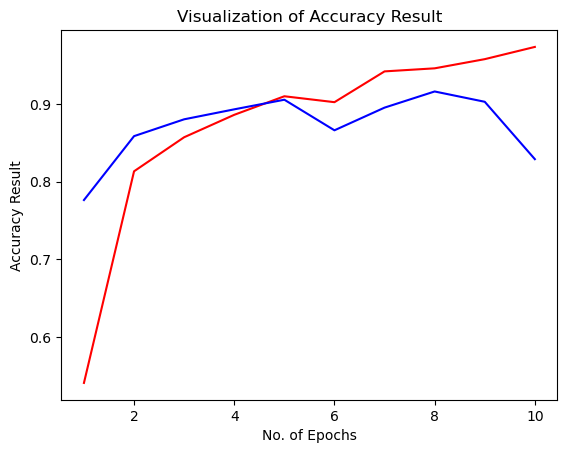

In [44]:
epochs = (i for i in range(1,11))
epochs_list = list(epochs)
plt.plot(epochs_list,training_history.history['accuracy'],color='red',label='Training_accuracy')
plt.plot(epochs_list,training_history.history['val_accuracy'],color='blue',label='Validation_accuracy')
plt.xlabel("No. of Epochs")
plt.ylabel("Accuracy Result")
plt.title("Visualization of Accuracy Result")
plt.show()

# Some Other Metrics for model evaluation


In [45]:
class_name = validation_set.class_names
class_name

['Tomato___Bacterial_spot',
 'Tomato___Early_blight',
 'Tomato___Late_blight',
 'Tomato___Tomato_mosaic_virus',
 'Tomato___healthy']

In [46]:
test_set = tf.keras.utils.image_dataset_from_directory(
    'valid',
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(128, 128),
    shuffle=False,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False,
    pad_to_aspect_ratio=False,
    verbose=True,
)

Found 2259 files belonging to 5 classes.


In [48]:
y_pred = model.predict(test_set)
y_pred,y_pred.shape

71/71 ━━━━━━━━━━━━━━━━━━━━ 39s 556ms/step


(array([[9.9999994e-01, 4.2406846e-08, 5.6326613e-08, 1.6483061e-15,
         1.2855012e-14],
        [9.9999994e-01, 4.7582044e-10, 2.7713403e-11, 6.2731777e-18,
         1.8633907e-16],
        [9.9999994e-01, 8.3351027e-11, 1.2784432e-12, 6.6115814e-18,
         1.9965047e-16],
        ...,
        [2.2057736e-04, 3.0473350e-07, 1.9791925e-03, 5.4689199e-06,
         9.9779451e-01],
        [5.8787920e-02, 2.9964942e-05, 3.7129075e-04, 3.0503512e-05,
         9.4078034e-01],
        [1.5601388e-09, 2.9404233e-05, 7.7066570e-06, 5.1654059e-08,
         9.9996281e-01]], dtype=float32),
 (2259, 5))

In [49]:
predicted_categories = tf.argmax(y_pred,axis=1)

In [50]:
predicted_categories

<tf.Tensor: shape=(2259,), dtype=int64, numpy=array([0, 0, 0, ..., 4, 4, 4])>

In [51]:
true_categories = tf.concat([y for x,y in test_set],axis=0)
true_categories

2024-05-17 12:36:29.872577: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


<tf.Tensor: shape=(2259, 5), dtype=float32, numpy=
array([[1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       ...,
       [0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 1.]], dtype=float32)>

In [52]:
Y_true = tf.argmax(true_categories,axis=1)
Y_true

<tf.Tensor: shape=(2259,), dtype=int64, numpy=array([0, 0, 0, ..., 4, 4, 4])>

In [55]:
from sklearn.metrics import classification_report,confusion_matrix

In [56]:
print(classification_report(Y_true,predicted_categories,target_names=class_name))

                              precision    recall  f1-score   support

     Tomato___Bacterial_spot       0.88      0.97      0.92       407
       Tomato___Early_blight       0.60      0.88      0.72       460
        Tomato___Late_blight       0.86      0.79      0.82       463
Tomato___Tomato_mosaic_virus       1.00      0.66      0.79       448
            Tomato___healthy       0.99      0.86      0.92       481

                    accuracy                           0.83      2259
                   macro avg       0.87      0.83      0.83      2259
                weighted avg       0.87      0.83      0.83      2259



In [57]:
cm = confusion_matrix(Y_true,predicted_categories)
cm.shape

(5, 5)

# Confusion Matrix Visualization

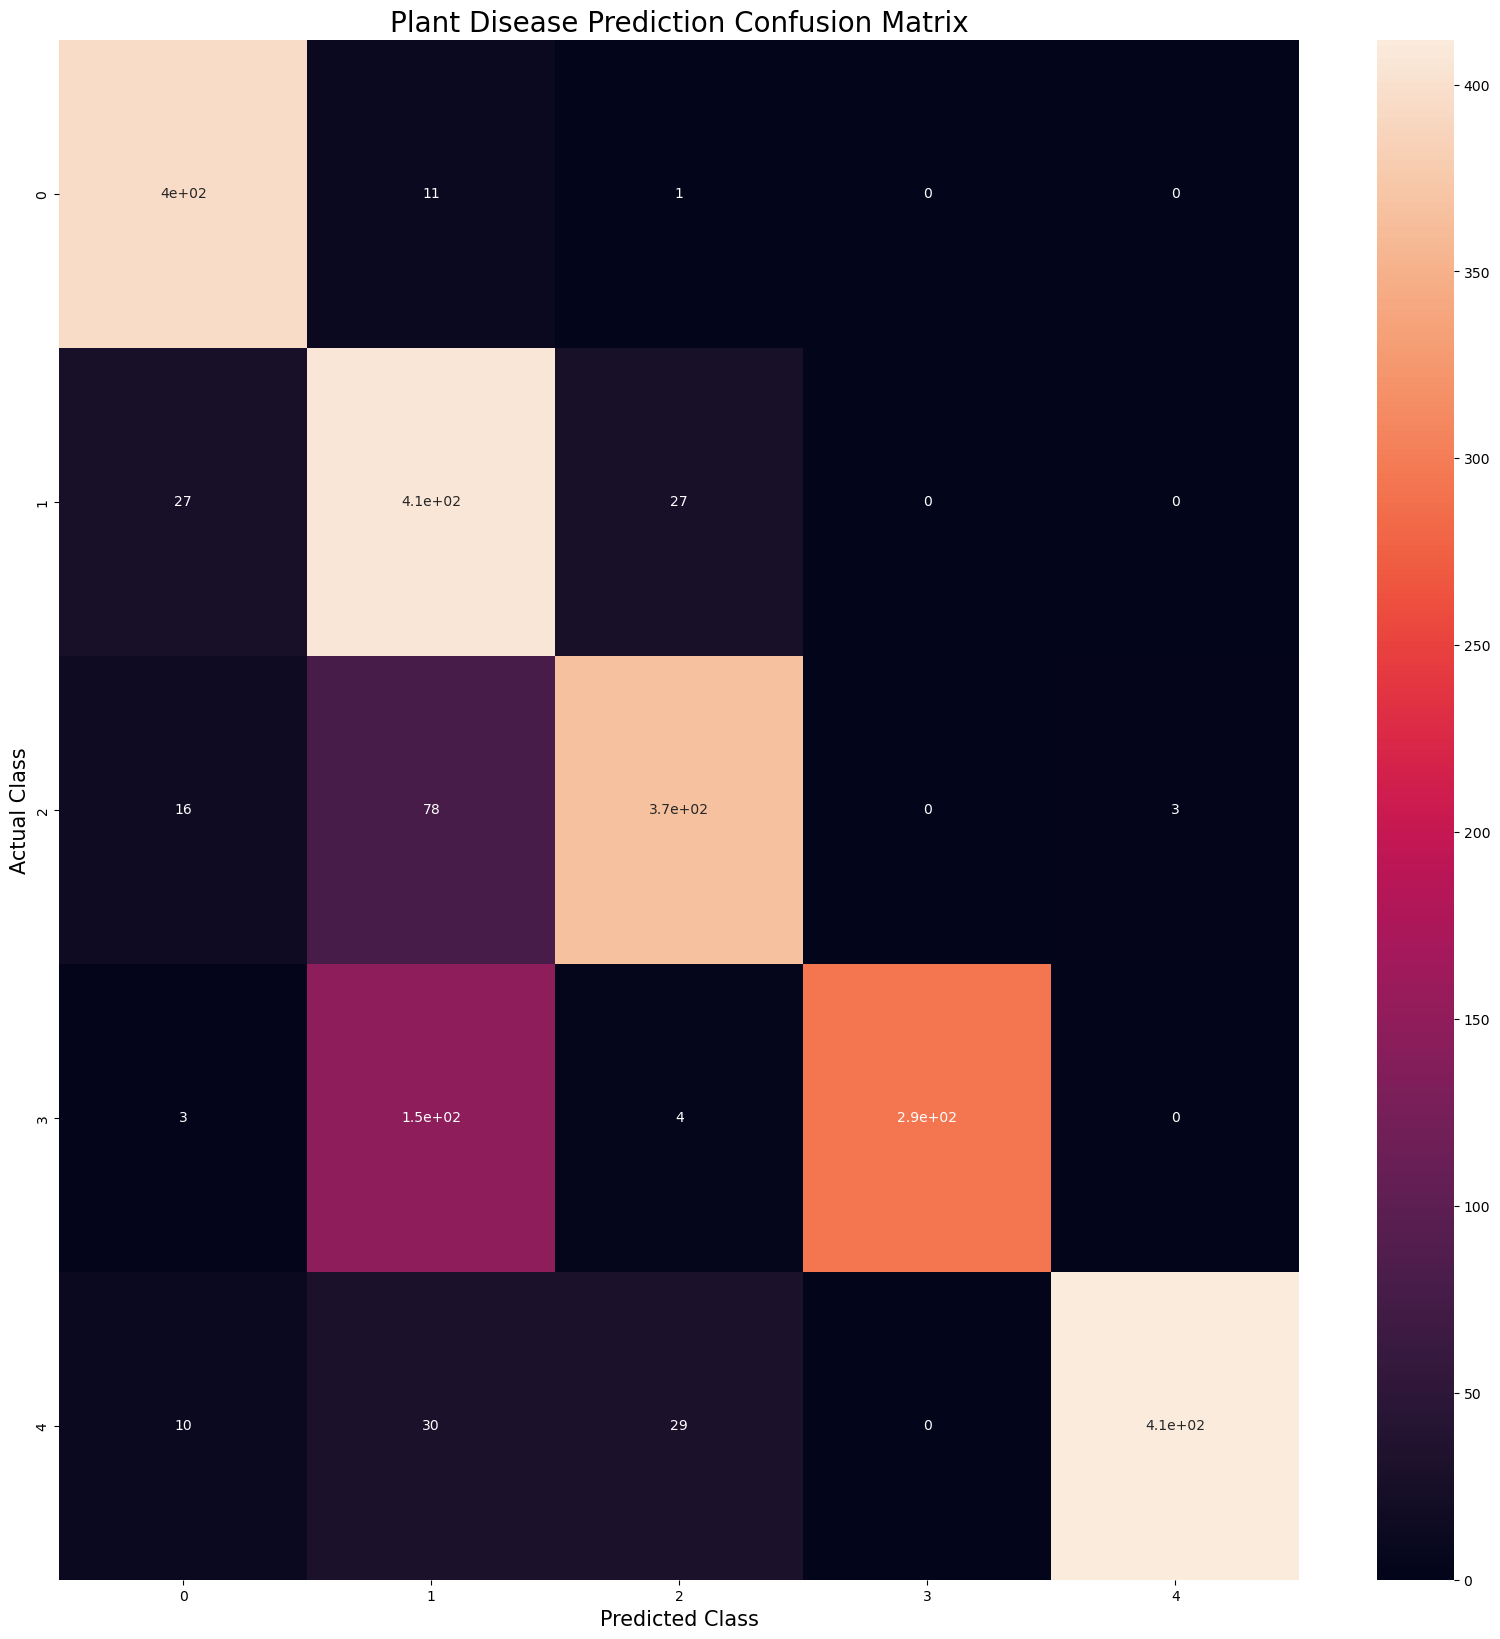

In [63]:
plt.figure(figsize=(20,20))
sns.heatmap(cm,annot=True,annot_kws={'size':10})
plt.xlabel("Predicted Class",fontsize=15)
plt.ylabel("Actual Class",fontsize=15)
plt.title("Plant Disease Prediction Confusion Matrix",fontsize=20)
plt.show()